In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.api import qqplot

In [2]:
df=pd.read_csv(r"C:\Users\Rishab Saini\Downloads\annual_csv.csv")

In [3]:
df.head()

,Date,Price
0,1950-12,34.72
1,1951-12,34.66
2,1952-12,34.79
3,1953-12,34.85
4,1954-12,35.04


In [4]:
df=pd.read_csv(r"C:\Users\Rishab Saini\Downloads\annual_csv.csv",index_col=[0],parse_dates=[0])

In [5]:
df.describe()

,Price
count,70.000000
mean,412.776457
std,444.932209
min,34.660000
25%,35.277500
50%,320.803500
75%,458.943500
max,1687.342000


<AxesSubplot:xlabel='Date'>

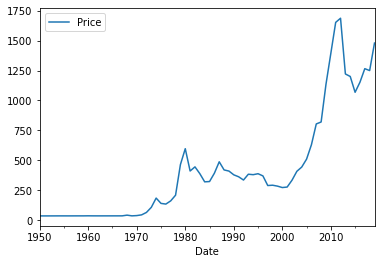

In [6]:
df.plot()

In [7]:
moving_df=df.rolling(window=20).mean()

In [8]:
moving_df.head(22)

,Price
Date,
1950-12-01,NaN
1951-12-01,NaN
1952-12-01,NaN
1953-12-01,NaN
1954-12-01,NaN
1955-12-01,NaN
1956-12-01,NaN
1957-12-01,NaN
1958-12-01,NaN


<AxesSubplot:xlabel='Date'>

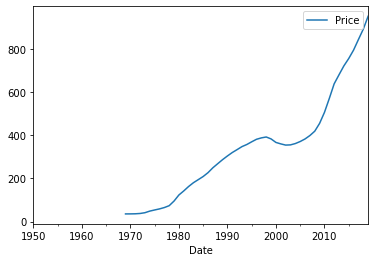

In [9]:
moving_df.plot()

In [10]:
sm.stats.durbin_watson(df)

array([0.03018743])

C:\Users\Rishab Saini\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


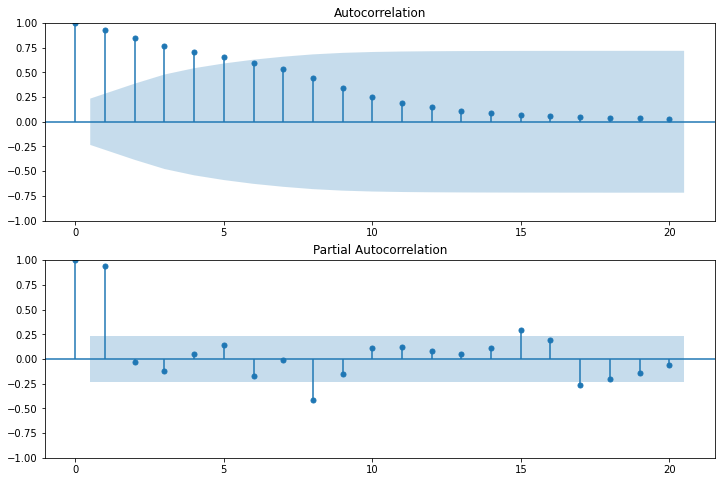

In [21]:
%matplotlib inline
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=sm.graphics.tsa.plot_acf(df.values.squeeze(),lags=20,ax=ax1)
ax2=fig.add_subplot(212)
fig=sm.graphics.tsa.plot_pacf(df,lags=20,ax=ax2)

In [12]:
training_data=df[0:320]
test_data=df[320:]

In [13]:
from statsmodels.tsa.arima.model import ARIMA

In [14]:
arima=ARIMA(training_data,order=(2,1,3))

C:\Users\Rishab Saini\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Rishab Saini\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Rishab Saini\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)


In [15]:
model=arima.fit()

In [16]:
model.aic

828.88461535235

In [25]:
pred=model.forecast(steps=45)
pred

2020-12-01    1441.687863
2021-12-01    1491.126197
2022-12-01    1499.243854
2023-12-01    1453.763712
2024-12-01    1510.098886
2025-12-01    1464.978841
2026-12-01    1487.256752
2027-12-01    1488.303696
2028-12-01    1471.368086
2029-12-01    1493.721312
2030-12-01    1475.045099
2031-12-01    1484.938343
2032-12-01    1484.455931
2033-12-01    1478.226274
2034-12-01    1487.052691
2035-12-01    1479.359658
2036-12-01    1483.700241
2037-12-01    1483.139810
2038-12-01    1480.881955
2039-12-01    1484.349396
2040-12-01    1481.195315
2041-12-01    1483.080259
2042-12-01    1482.706916
2043-12-01    1481.903558
2044-12-01    1483.258380
2045-12-01    1481.971108
2046-12-01    1482.782415
2047-12-01    1482.572790
2048-12-01    1482.293705
2049-12-01    1482.820008
2050-12-01    1482.296978
2051-12-01    1482.643447
2052-12-01    1482.535340
2053-12-01    1482.441489
2054-12-01    1482.644660
2055-12-01    1482.433086
2056-12-01    1482.580010
2057-12-01    1482.527050
2058-12-01  

In [18]:
from sklearn.metrics import mean_squared_error

In [35]:
from sklearn.metrics import mean_squared_error

# Assuming data is already loaded and processed

# Split the data into training and testing sets
train_size = int(len(df) * 0.8)
train, test = df[0:train_size], df[train_size:]

# Train the ARIMA model on the training set
model = ARIMA(train['Price'], order=(2,1,3))
results = model.fit()

# Make predictions on the testing set
forecast_steps = len(test)
forecast = results.get_forecast(steps=forecast_steps)
predicted_values = forecast.predicted_mean

# Calculate Mean Squared Error
mse = mean_squared_error(test['Price'], predicted_values)
print('Mean Squared Error:', mse)


C:\Users\Rishab Saini\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Rishab Saini\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\Rishab Saini\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency AS-DEC will be used.
  self._init_dates(dates, freq)


Mean Squared Error: 602856.7656964528


C:\Users\Rishab Saini\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
